In [60]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# read in the data and print it
recipes = pd.read_csv('recipes.csv')
recipes

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56,NaN,NaN,NaN,NaN


###### 1.Print the names of Columns that have null values

In [3]:
null_col=recipes.columns[recipes.isna().any()].tolist() 
null_col

['FiberAmount',
 'FiberpercentOfDailyNeed',
 'VitaminB6Amount',
 'VitaminB6percentOfDailyNeed',
 'ManganeseAmount',
 'ManganesepercentOfDailyNeed',
 'SeleniumAmount',
 'SeleniumpercentOfDailyNeed',
 'PotassiumAmount',
 'PotassiumpercentOfDailyNeed',
 'VitaminB2Amount',
 'VitaminB2percentOfDailyNeed',
 'VitaminCAmount',
 'VitaminCpercentOfDailyNeed',
 'PhosphorusAmount',
 'PhosphoruspercentOfDailyNeed',
 'FolateAmount',
 'FolatepercentOfDailyNeed',
 'VitaminB5Amount',
 'VitaminB5percentOfDailyNeed',
 'MagnesiumAmount',
 'MagnesiumpercentOfDailyNeed',
 'IronAmount',
 'IronpercentOfDailyNeed',
 'VitaminKAmount',
 'VitaminKpercentOfDailyNeed',
 'CopperAmount',
 'CopperpercentOfDailyNeed',
 'VitaminAAmount',
 'VitaminApercentOfDailyNeed',
 'VitaminB12Amount',
 'VitaminB12percentOfDailyNeed',
 'VitaminDAmount',
 'VitaminDpercentOfDailyNeed',
 'ZincAmount',
 'ZincpercentOfDailyNeed',
 'VitaminEAmount',
 'VitaminEpercentOfDailyNeed',
 'VitaminB3Amount',
 'VitaminB3percentOfDailyNeed',
 'Vitami

###### 2.Print the recipes with the highest number of aggregateLikes

In [7]:
max_likes=recipes[recipes['aggregateLikes'] == recipes['aggregateLikes'].max()]
max_likes

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
50,50,False,True,True,False,4.0,16911,715419,Slow Cooker Spicy Hot Wings,101.43,...,7.42,37.09,0.08,5.0,44.21,4.42,NaN,NaN,NaN,NaN


###### 3.Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.


In [8]:
#finding the cells with NaN in the column

nan_col_CalciumPercent=recipes['CalciumpercentOfDailyNeed'].isna().sum()  
nan_col_CalciumPercent

8

In [9]:
#calculating the mean and replacing the NaN with mean

mean_CalciumPercent = recipes['CalciumpercentOfDailyNeed'].mean() 
mean_CalciumPercent

12.256690140845066

In [10]:
#assigning  the mean to missing values in the column with mean

recipes['CalciumpercentOfDailyNeed'].fillna(mean_CalciumPercent) 

0       1.81000
1      12.25669
2      10.08000
3       2.68000
4      16.28000
         ...   
145    10.27000
146     1.98000
147    14.12000
148     5.56000
149     2.80000
Name: CalciumpercentOfDailyNeed, Length: 150, dtype: float64

In [11]:
recipes.isna().sum()        #after replcing the NaN with mean the sum should be Zero

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       8
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [13]:
#sort the dataframe by column by id

new_recipes=recipes.sort_values(by=['id'])
new_recipes

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


###### 4.Delete the columns that have null values == 141

In [23]:
# checking or identifying columns with null values == 141
columns_with_141=new_recipes.isnull().sum()
columns_with_141

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       8
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [24]:
new_recipes.drop(columns=['CaffeineAmount', 'CaffeinepercentOfDailyNeed'], axis=1, inplace = True)



In [25]:
new_recipes.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminEAmount,VitaminEpercentOfDailyNeed,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,0.84,5.61,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,4.61,30.71,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,0.53,3.52,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,1.08,7.19,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,3.98,26.52,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN


###### 5.Print the title of the recipes that are vegetarian == TRUE and glutenFree == True

In [26]:
new_recipes[(new_recipes['vegetarian'] == True) & (new_recipes['glutenFree'] == True) ].title.tolist()

['Banana Blueberry Pancakes',
 'Basil and Orange Confit Compound Butter',
 'Beet Slaw',
 'Blender Carrot Soup',
 'Blueberry Mojito Popsicles',
 'Breakfast Porridge',
 'Butternut Squash Soup',
 'Cauliflower Chickpea Stew',
 'Cherries and Yogurt Parfait',
 'Dandelion pesto',
 'Detox Orange Carrot Juice',
 'Easy Eggplant Parmesan',
 'EASY, CUMIN-LENTIL SPREAD',
 'Fire Roasted Tomato Chutney',
 'Fried Brown Rice',
 'Green Beans with Garlic Chips',
 'Indian-Style Dill and Turmeric Potato Salad',
 'Japanese Cucumber Salad',
 'Kappa Maki',
 'Layered Greek Salad',
 'Luscious Palak Paneer',
 'Mango Cranberry Sherbet',
 'Nutty Rice',
 'Peach Coconut Ice Cream',
 'Peanut Butter Cookies with Flax Seeds and Chocolate',
 'Roasted Asparagus with Egg Salad',
 'Roasted Strawberry Coconut Milk Ice Cream',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Seasonal Autumn Stew',
 'Spicy Carrot Amaranth Soup',
 'Stir Fried Cabbage and Tomatoes',
 

###### 6.How many vegan recipes are there (Vegan = Vegetarian and dairy free)?



In [27]:
len(new_recipes[(new_recipes['vegetarian'] == True) & (new_recipes['dairyFree'] == True) ].title.tolist())

29

###### 7.Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. How reliable are the results?



In [47]:
#average amount of Vitamin B12 for the vegan
vegan =new_recipes[new_recipes['vegetarian'] == True].VitaminB12Amount.mean()
vegan



0.48357142857142865

In [48]:
#average amount of Vitamin B12 for the non-vegan
Non_vegan = new_recipes[new_recipes['vegetarian'] == False].VitaminB12Amount.mean()
Non_vegan

1.2353846153846157

In [49]:
#How reliable are the results

if avg_vegan>Non_vegan:
    print("non-vegan has less amount of Vitamin B12 ")
else:
    print("vegan has less amount of Vitamin B12 ")

vegan has less amount of Vitamin B12 


###### 8.Compare the average health Score for both types of recipes (vegan vs non-vegan).



In [50]:
#Average health Score for Vegan recipes
vegan= new_recipes[new_recipes['vegetarian'] == True]['healthScore'].mean()
vegan

18.484848484848484

In [51]:
#Average health Score for NoN-Vegan recipes
Non_vegan= new_recipes[new_recipes['vegetarian'] == False]['healthScore'].mean()
Non_vegan

22.107142857142858

In [52]:
if vegan>Non_vegan:
    print("non-vegan has less health score ")
else:
    print("vegan has less health score ")

vegan has less health score 


###### 9.Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, but only if they already cost more than 100.


In [37]:
new_recipes['VeganWeek']=new_recipes[(new_recipes['pricePerServing'] > 100) & (new_recipes['vegetarian'] == True)]['pricePerServing']*0.9

In [38]:
new_recipes[['title','pricePerServing','VeganWeek','vegetarian']]

,title,pricePerServing,VeganWeek,vegetarian
83,Oeufs En Meurette,209.85,NaN,False
43,Tortilla Burger Loco Vaca,407.86,NaN,False
104,"Bad Boy"" Giant Double Chocolate Cookies",44.08,NaN,False
95,Allergy-Free Stuffed Portobello Mushrooms,138.47,NaN,False
52,Almond Butter and Chocolate Squares,92.26,NaN,False
...,...,...,...,...
134,Garlic-Roasted Brussels Sprouts Side Dish,170.34,153.306,True
30,Vegan Chana Masala Curry,165.89,149.301,True
118,Potato & Leek Soup with Roasted Beets,244.08,NaN,False
39,Three Ingredient Frozen Pina Colada,214.60,193.140,True


###### 10.Among the non-vegan recipes, find the one requiring most time to prepare. How is it called?



In [53]:
new_recipes[(new_recipes['readyInMinutes']==new_recipes['readyInMinutes'].max())&(new_recipes['vegetarian'] == False)][['title','readyInMinutes']]

,title,readyInMinutes
83,Oeufs En Meurette,328


###### 10. Build a model using linear regression on this dataset

In [55]:
data = new_recipes[['CaloriesAmount','healthScore']]
data

,CaloriesAmount,healthScore
83,251.21,5.0
43,1114.97,44.0
104,358.82,4.0
95,87.75,9.0
52,359.16,2.0
...,...,...
134,265.27,77.0
30,482.98,17.0
118,150.35,38.0
39,320.34,7.0


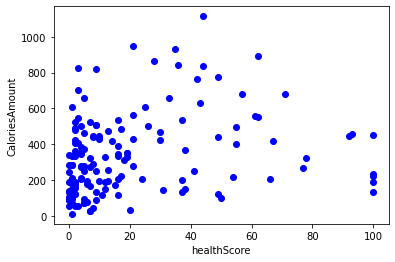

In [56]:

# plotting data

plt.scatter(data['healthScore'] , data['CaloriesAmount'] , color='blue')
plt.xlabel('healthScore')
plt.ylabel('CaloriesAmount')
plt.show()

In [57]:
#Dividing the data into training and testing data 
# Generating training and testing data from our data 
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [61]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['healthScore']])
train_y = np.array(train[['CaloriesAmount']])
regr.fit(train_x,train_y)

LinearRegression()

In [63]:
print ('coefficients :' ,regr.coef_) 
print ('Intercept : ',regr.intercept_) 

coefficients : [[2.03080588]]
Intercept :  [298.31758316]


Text(0, 0.5, 'CaloriesAmount')

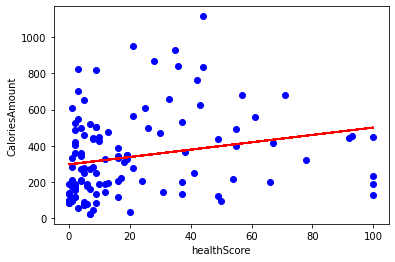

In [64]:
# Plotting the regression line:
plt.scatter(train['healthScore'], train['CaloriesAmount'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('healthScore')
plt.ylabel('CaloriesAmount')